In [ ]:
import yfinance
import numpy
import matplotlib
import pandas

In [ ]:
ticker_list = ["GC=F","SIL=F","PL=F","PA=F"]
df=pandas.DataFrame()
for ticker_symbol in ticker_list:
  ticker = yfinance.Ticker(ticker_symbol)
  historical_data = ticker.history(period="1y")
  df[ticker_symbol]=historical_data['Close']

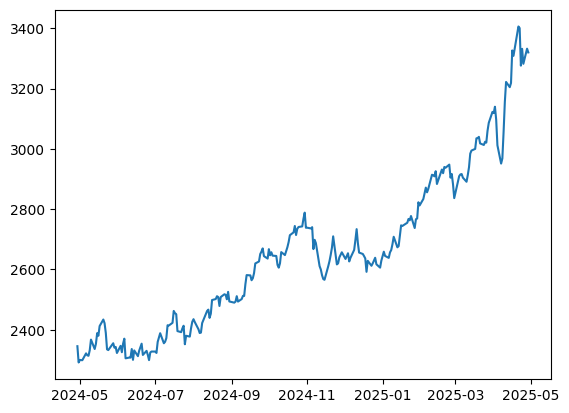

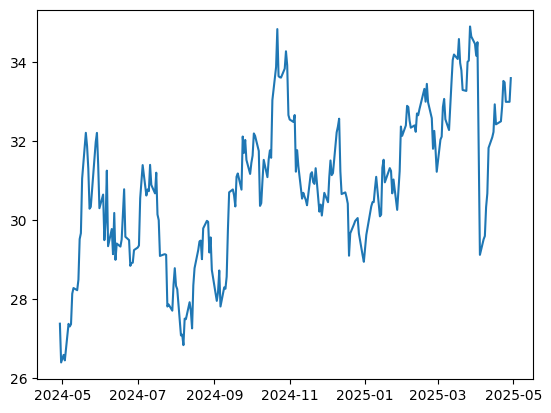

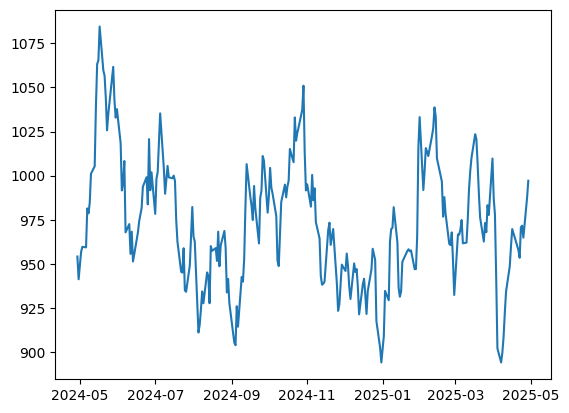

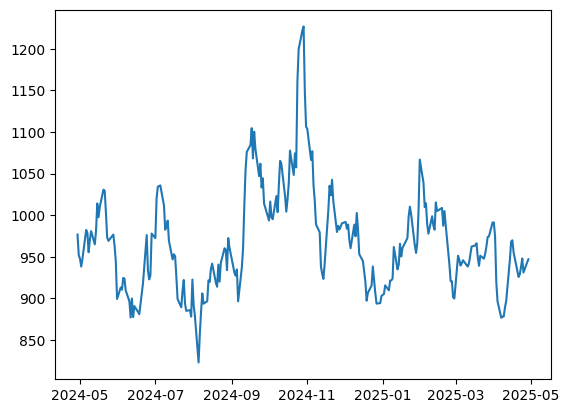

In [ ]:
for ticker_symbol in ticker_list:
  matplotlib.pyplot.plot(df[ticker_symbol])
  matplotlib.pyplot.show()

In [ ]:

for ticker_symbol in ticker_list:
  df[f"{ticker_symbol}_RETURNS"]=numpy.log(df[ticker_symbol]/df[ticker_symbol].shift(1))

df_weights=pandas.DataFrame([df[f"{ticker_symbol}_RETURNS"].mean()/df[f"{ticker_symbol}_RETURNS"].std() for ticker_symbol in ticker_list])
df_weights=df_weights/df_weights.sum()
df_weights.index=ticker_list

In [ ]:
df['BENCH']=(df[ticker_list]*numpy.transpose(df_weights.values)).sum(axis=1)
df['BENCH_RETURN']=numpy.log(df['BENCH']/df['BENCH'].shift(1))

In [ ]:
df_beta=pandas.DataFrame([df[f"{ticker_symbol}_RETURNS"].cov(df['BENCH_RETURN'])/df['BENCH_RETURN'].var() for ticker_symbol in ticker_list])
df_beta.index=ticker_list

In [ ]:
df_alpha=pandas.DataFrame([df[f"{ticker_symbol}_RETURNS"].mean() - df_beta.loc[ticker_symbol]*df['BENCH_RETURN'].mean() for ticker_symbol in ticker_list])
df_alpha.index=ticker_list

In [ ]:
df_treynor_ratio=pandas.DataFrame([df[f"{ticker_symbol}_RETURNS"].mean()/df_beta.loc[ticker_symbol] for ticker_symbol in ticker_list])
df_treynor_ratio.index=ticker_list

In [ ]:
df_treynor_ratio

,0
GC=F,0.001379
SIL=F,0.000590
PL=F,0.000228
PA=F,-0.000137


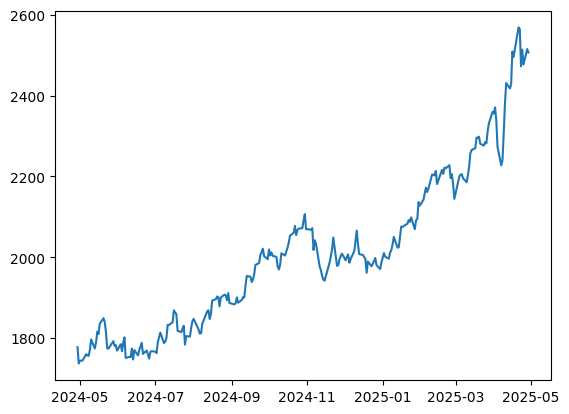

In [ ]:
matplotlib.pyplot.plot(df['BENCH'])

In [ ]:
for ticker_symbol in ticker_list:
  df[f"{ticker_symbol}_rolling_beta"]=df[f"{ticker_symbol}_RETURNS"].rolling(window=21).cov(df['BENCH_RETURN'])/df['BENCH_RETURN'].rolling(window=21).var()


In [ ]:
for ticker_symbol in ticker_list:
  df[f"{ticker_symbol}_rolling_alpha"]=df[f"{ticker_symbol}_RETURNS"].rolling(window=21).mean()-df[f"{ticker_symbol}_rolling_beta"]*df['BENCH_RETURN'].rolling(window=21).mean()

In [ ]:
for ticker_symbol in ticker_list:
  df[f"{ticker_symbol}_rolling_treynor_ratio"]=df[f"{ticker_symbol}_RETURNS"].rolling(window=21).mean()/df[f"{ticker_symbol}_rolling_beta"]

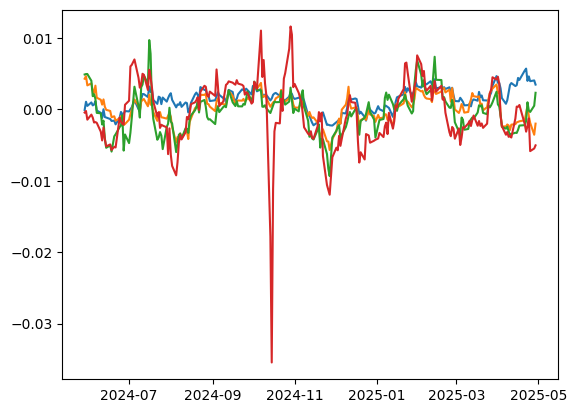

In [ ]:
for ticker_symbol in ticker_list:
  matplotlib.pyplot.plot(df[f"{ticker_symbol}_rolling_treynor_ratio"])
